In [1]:
import pandas as pd
import numpy as np
import calendar
import itertools


from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import train_test_split
from statsmodels.tsa.stattools import acf, pacf

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from statsmodels.tsa.holtwinters import ExponentialSmoothing, SimpleExpSmoothing, Holt
import statsmodels.tsa.api as smt
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA

import warnings
warnings.filterwarnings('ignore')

In [2]:
como = pd.read_csv('Project - 3 - India_Key_Commodities_Retail_Prices_1997_2015.csv')
como.head()

,Date,Centre,Commodity,Price per Kg,Region,Country
0,25-11-1997,LUCKNOW,Tur/Arhar Dal,15.0,NORTH,INDIA
1,25-11-1997,BHOPAL,Tur/Arhar Dal,18.0,WEST,INDIA
2,25-11-1997,JAIPUR,Tur/Arhar Dal,20.0,WEST,INDIA
3,25-11-1997,SHIMLA,Tur/Arhar Dal,21.5,NORTH,INDIA
4,25-11-1997,AHMEDABAD,Tur/Arhar Dal,21.5,WEST,INDIA


In [3]:
como.shape

(846672, 6)

In [4]:
date = [pd.datetime.strptime(d,'%d-%m-%Y') for d in como.Date]
como['Timeindex'] = date
como.head()

,Date,Centre,Commodity,Price per Kg,Region,Country,Timeindex
0,25-11-1997,LUCKNOW,Tur/Arhar Dal,15.0,NORTH,INDIA,1997-11-25
1,25-11-1997,BHOPAL,Tur/Arhar Dal,18.0,WEST,INDIA,1997-11-25
2,25-11-1997,JAIPUR,Tur/Arhar Dal,20.0,WEST,INDIA,1997-11-25
3,25-11-1997,SHIMLA,Tur/Arhar Dal,21.5,NORTH,INDIA,1997-11-25
4,25-11-1997,AHMEDABAD,Tur/Arhar Dal,21.5,WEST,INDIA,1997-11-25


In [5]:
como['Month-year'] = como.Timeindex.dt.to_period('M')
como.head()

,Date,Centre,Commodity,Price per Kg,Region,Country,Timeindex,Month-year
0,25-11-1997,LUCKNOW,Tur/Arhar Dal,15.0,NORTH,INDIA,1997-11-25,1997-11
1,25-11-1997,BHOPAL,Tur/Arhar Dal,18.0,WEST,INDIA,1997-11-25,1997-11
2,25-11-1997,JAIPUR,Tur/Arhar Dal,20.0,WEST,INDIA,1997-11-25,1997-11
3,25-11-1997,SHIMLA,Tur/Arhar Dal,21.5,NORTH,INDIA,1997-11-25,1997-11
4,25-11-1997,AHMEDABAD,Tur/Arhar Dal,21.5,WEST,INDIA,1997-11-25,1997-11


In [6]:
north = como[(como.Region == 'NORTH')]

In [7]:
north.head()

,Date,Centre,Commodity,Price per Kg,Region,Country,Timeindex,Month-year
0,25-11-1997,LUCKNOW,Tur/Arhar Dal,15.0,NORTH,INDIA,1997-11-25,1997-11
3,25-11-1997,SHIMLA,Tur/Arhar Dal,21.5,NORTH,INDIA,1997-11-25,1997-11
5,25-11-1997,DELHI,Tur/Arhar Dal,22.0,NORTH,INDIA,1997-11-25,1997-11
16,26-11-1997,DELHI,Tur/Arhar Dal,22.0,NORTH,INDIA,1997-11-26,1997-11
17,26-11-1997,SHIMLA,Tur/Arhar Dal,21.5,NORTH,INDIA,1997-11-26,1997-11


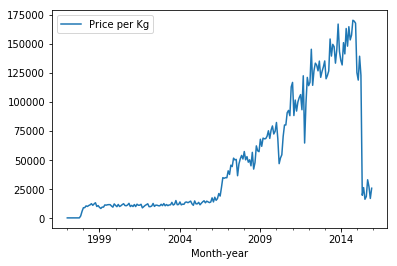

In [8]:
north.groupby('Month-year').sum().plot()
plt.show()

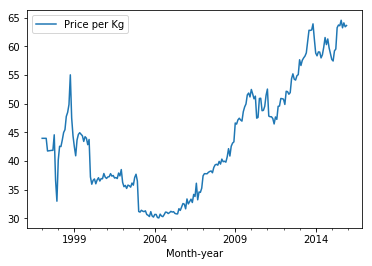

In [9]:
north.groupby('Month-year').mean().plot()
plt.show()

In [10]:
commodity = north.Commodity.unique()
commodity

array(['Tur/Arhar Dal', 'Tomato', 'Tea Loose', 'Sunflower Oil (Packed)',
       'Sugar', 'Salt Pack (Iodised)', 'Onion', 'Milk', 'Rice'],
      dtype=object)

Tur/Arhar Dal


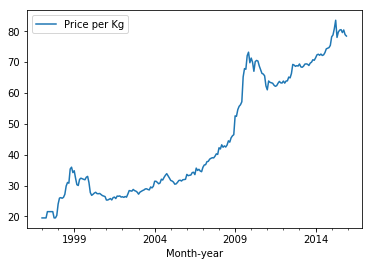

Tomato


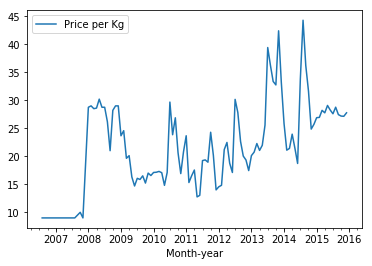

Tea Loose


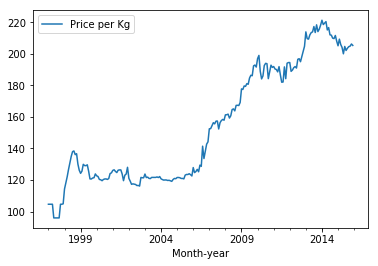

Sunflower Oil (Packed)


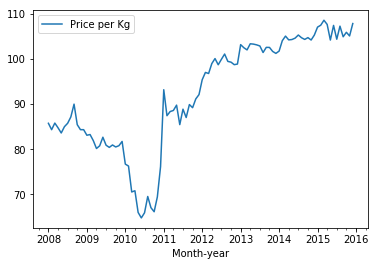

Sugar


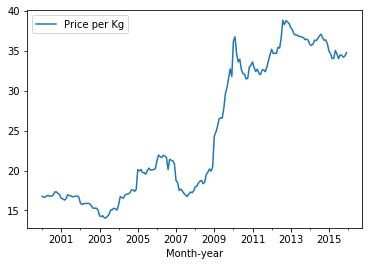

Salt Pack (Iodised)


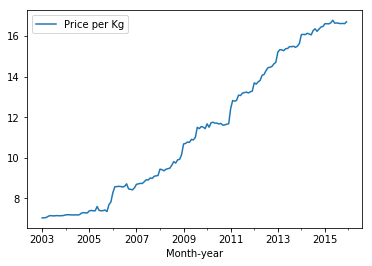

Onion


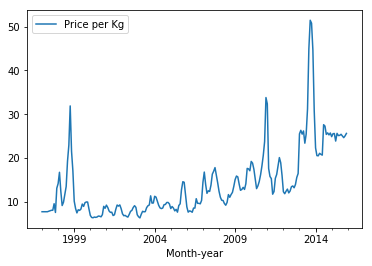

Milk


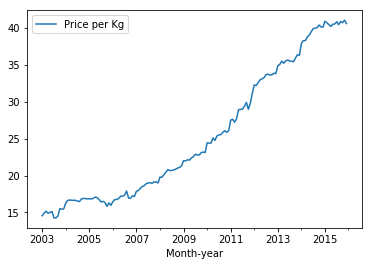

Rice


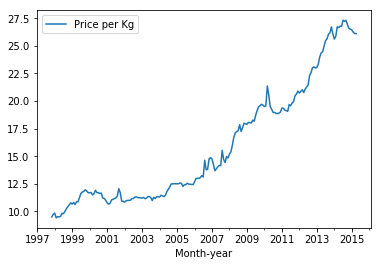

In [11]:
for i in commodity:
    print(i)
    north[north.Commodity == i].groupby('Month-year').mean().plot()
    plt.show()

# Tur/Arhar Dal Analysis in North region

## Feature Engineering

In [12]:
dal = north[north.Commodity == 'Onion']

In [13]:
dal= dal.groupby('Month-year').mean().reset_index()

In [14]:
dal.head(10)

,Month-year,Price per Kg
0,1997-01,7.666667
1,1997-02,7.666667
2,1997-03,7.666667
3,1997-04,7.666667
4,1997-05,7.666667
5,1997-08,8.000000
6,1997-09,8.000000
7,1997-10,9.500000
8,1997-11,7.500000
9,1997-12,13.051282


In [15]:
month=dal['Month-year'].dt.month
dal['Month'] = [calendar.month_abbr[i] for i in month]
dal['Year']=dal['Month-year'].dt.year

In [16]:
dal.head(5)

,Month-year,Price per Kg,Month,Year
0,1997-01,7.666667,Jan,1997
1,1997-02,7.666667,Feb,1997
2,1997-03,7.666667,Mar,1997
3,1997-04,7.666667,Apr,1997
4,1997-05,7.666667,May,1997


In [17]:
dal.tail()

,Month-year,Price per Kg,Month,Year
221,2015-08,25.394737,Aug,2015
222,2015-09,25.000000,Sep,2015
223,2015-10,24.625000,Oct,2015
224,2015-11,25.027778,Nov,2015
225,2015-12,25.592593,Dec,2015


In [18]:
len(dal)

226

## Missing Value Treatment

In [19]:
dal=dal.set_index('Month-year')
dal.head()

,Price per Kg,Month,Year
Month-year,,,
1997-01,7.666667,Jan,1997
1997-02,7.666667,Feb,1997
1997-03,7.666667,Mar,1997
1997-04,7.666667,Apr,1997
1997-05,7.666667,May,1997


In [20]:
dal=dal.reindex(pd.period_range(dal.index[0],dal.index[-1], freq='M'))
dal=dal.reset_index()
dal.head(12)

,index,Price per Kg,Month,Year
0,1997-01,7.666667,Jan,1997.0
1,1997-02,7.666667,Feb,1997.0
2,1997-03,7.666667,Mar,1997.0
3,1997-04,7.666667,Apr,1997.0
4,1997-05,7.666667,May,1997.0
5,1997-06,NaN,NaN,NaN
6,1997-07,NaN,NaN,NaN
7,1997-08,8.000000,Aug,1997.0
8,1997-09,8.000000,Sep,1997.0
9,1997-10,9.500000,Oct,1997.0


In [21]:
len(dal)

228

In [22]:
#date = pd.date_range(start='31-01-1997', end='31-12-2015',freq='M')

In [23]:
#newdal = pd.DataFrame({'Timeindex': date})

In [24]:
#newdal['Month-year'] = newdal.Timeindex.dt.to_period('M')
#newdal.head()

In [25]:
#dal = newdal.set_index('Month-year').join(dal.set_index('Month-year'))

In [26]:
#dal.reset_index(inplace=True)

In [27]:
dal.columns

Index(['index', 'Price per Kg', 'Month', 'Year'], dtype='object')

In [28]:
dal.columns = ['Month-year', 'Price per Kg', 'Month', 'Year']
dal.head(10)

,Month-year,Price per Kg,Month,Year
0,1997-01,7.666667,Jan,1997.0
1,1997-02,7.666667,Feb,1997.0
2,1997-03,7.666667,Mar,1997.0
3,1997-04,7.666667,Apr,1997.0
4,1997-05,7.666667,May,1997.0
5,1997-06,NaN,NaN,NaN
6,1997-07,NaN,NaN,NaN
7,1997-08,8.000000,Aug,1997.0
8,1997-09,8.000000,Sep,1997.0
9,1997-10,9.500000,Oct,1997.0


In [29]:
month=dal['Month-year'].dt.month
dal['Month'] = [calendar.month_abbr[i] for i in month]
dal['Year']=dal['Month-year'].dt.year

In [30]:
dal.head(12)

,Month-year,Price per Kg,Month,Year
0,1997-01,7.666667,Jan,1997
1,1997-02,7.666667,Feb,1997
2,1997-03,7.666667,Mar,1997
3,1997-04,7.666667,Apr,1997
4,1997-05,7.666667,May,1997
5,1997-06,NaN,Jun,1997
6,1997-07,NaN,Jul,1997
7,1997-08,8.000000,Aug,1997
8,1997-09,8.000000,Sep,1997
9,1997-10,9.500000,Oct,1997


In [31]:
dal.isnull().sum()

Month-year      0
Price per Kg    2
Month           0
Year            0
dtype: int64

In [32]:
np.mean(dal['Price per Kg'])

14.04336142091595

In [33]:
dal.head(12)

,Month-year,Price per Kg,Month,Year
0,1997-01,7.666667,Jan,1997
1,1997-02,7.666667,Feb,1997
2,1997-03,7.666667,Mar,1997
3,1997-04,7.666667,Apr,1997
4,1997-05,7.666667,May,1997
5,1997-06,NaN,Jun,1997
6,1997-07,NaN,Jul,1997
7,1997-08,8.000000,Aug,1997
8,1997-09,8.000000,Sep,1997
9,1997-10,9.500000,Oct,1997


In [34]:
dal.tail()

,Month-year,Price per Kg,Month,Year
223,2015-08,25.394737,Aug,2015
224,2015-09,25.000000,Sep,2015
225,2015-10,24.625000,Oct,2015
226,2015-11,25.027778,Nov,2015
227,2015-12,25.592593,Dec,2015


In [35]:
date = pd.date_range(start='01-31-1997', end='12-31-2015', freq='M')
dal['Timeindex'] = date

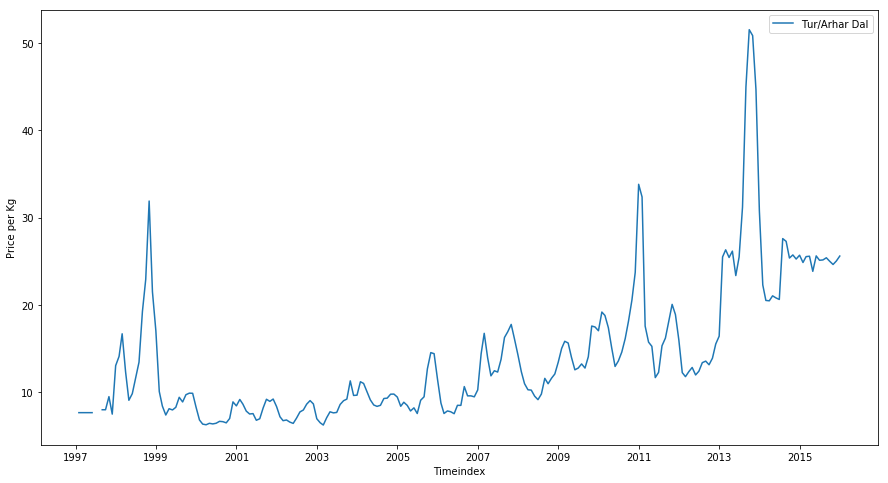

In [36]:
plt.figure(figsize=(15,8))
plt.plot(dal.Timeindex, dal['Price per Kg'], label='Tur/Arhar Dal')
plt.xlabel('Timeindex')
plt.ylabel('Price per Kg')
#plt.title('Onion Price')
plt.legend()
plt.show()

In [37]:
dal['Price per Kg'].interpolate(method='linear', inplace=True)

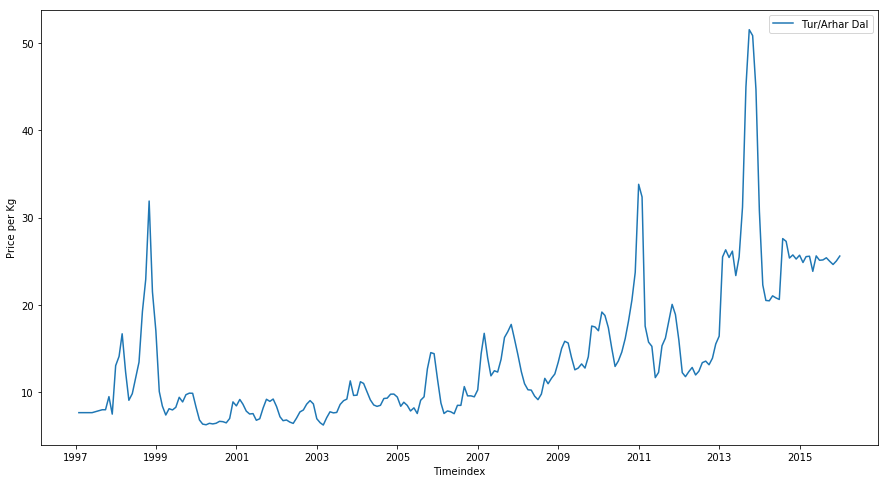

In [38]:
plt.figure(figsize=(15,8))
plt.plot(dal.Timeindex, dal['Price per Kg'],label='Tur/Arhar Dal')
plt.xlabel('Timeindex')
plt.ylabel('Price per Kg')
#plt.title('Onion Price')
plt.legend()
plt.show()

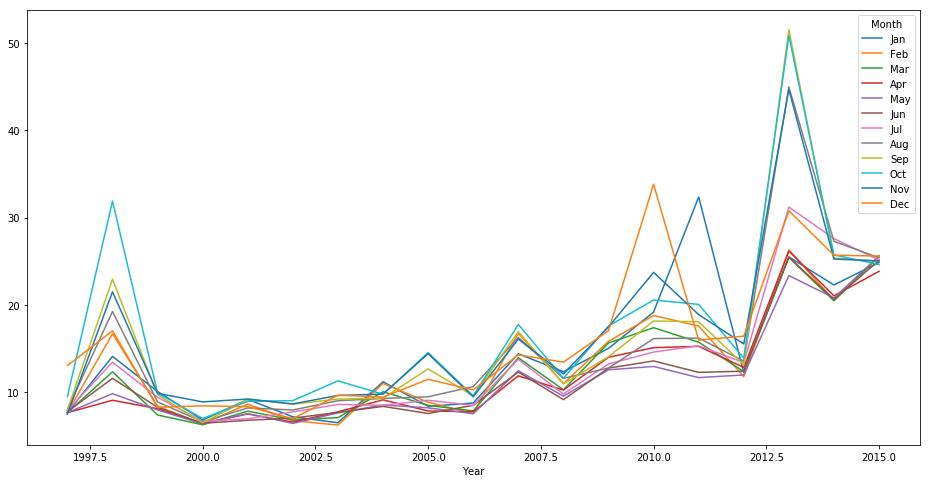

In [39]:
monthabb = [calendar.month_abbr[i] for i in range(1,13)]
pivottable=pd.pivot_table(dal,values='Price per Kg',columns='Month',index='Year')
pivottable=pivottable.reindex_axis(monthabb,axis=1)
pivottable.plot(figsize=(16,8))
plt.show()

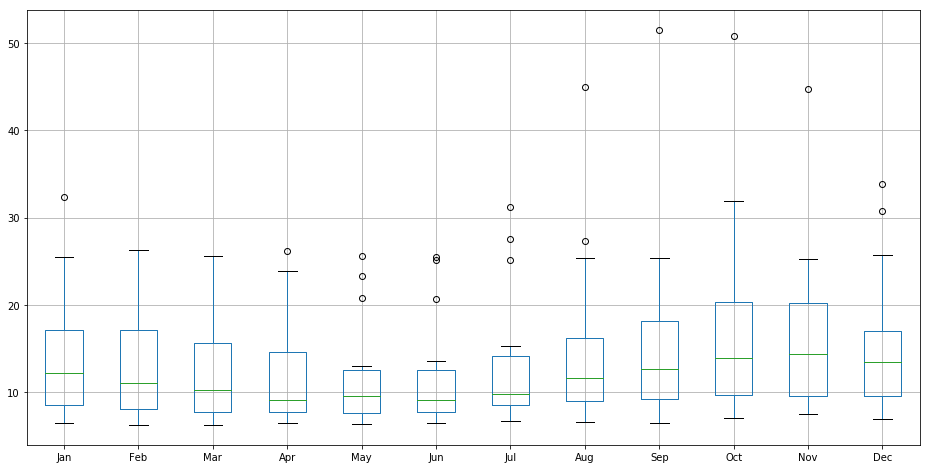

In [40]:
pivottable.boxplot(figsize=(16,8))
plt.show()

## Test-Train Split

In [41]:
train = dal.head(len(dal)-24)
test = dal.tail(24)

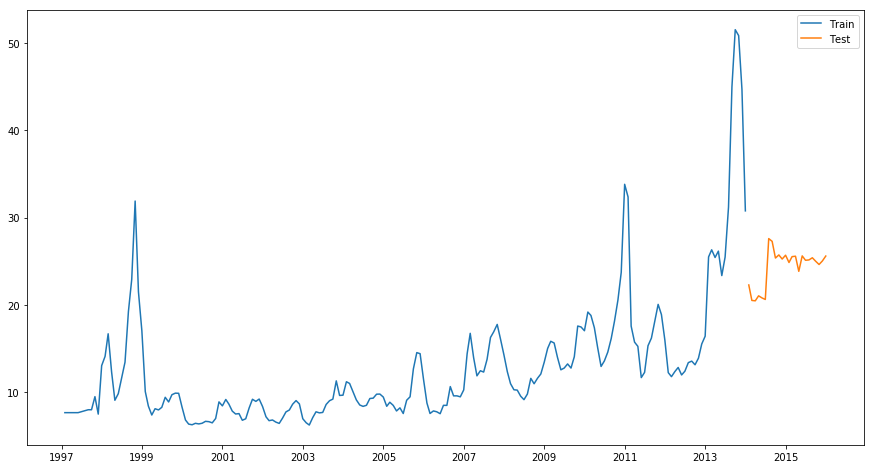

In [42]:
plt.figure(figsize=(15,8))
plt.plot(train.Timeindex, train['Price per Kg'], label = 'Train')
plt.plot(test.Timeindex, test['Price per Kg'], label= 'Test')
plt.savefig('train-test')
plt.legend()
plt.show()

## Define Evaluation Function

In [43]:
def mape(x,y):
    x,y = np.array(x), np.array(y)
    temp = np.mean(np.abs(x-y)/x)
    return round(temp*100,2)

## 1. Simple Exponential Model

In [44]:
model = SimpleExpSmoothing(np.asarray(train['Price per Kg']))

In [45]:
s=0
alpha=[]
for i in range(20):
    alpha.append(s)
    s= s+0.05

In [46]:
alpha_val =[]
mapeval =[]
for i in alpha:
    model_fit = model.fit(smoothing_level=i,optimized=False)
    fcst = model_fit.forecast(len(test['Price per Kg']))
    alpha_val.append(i)
    mapeval.append(mape(test['Price per Kg'], fcst))

In [47]:
a=pd.DataFrame({'alpha': alpha_val, 'MAPE': mapeval})
a=a.sort_values('MAPE').reset_index()
a.drop('index',axis=1, inplace=True)
a.iloc[0]

alpha    0.05
MAPE     7.48
Name: 0, dtype: float64

In [48]:
model_fit = model.fit(smoothing_level=0.05,optimized=False)
fcst = model_fit.forecast(len(test['Price per Kg']))
test['ForecastSE'] = fcst

In [49]:
model = SimpleExpSmoothing(np.asarray(dal['Price per Kg']))
model_fit = model.fit(smoothing_level=0.05,optimized=False)
fcst = model_fit.forecast(12)
daldf = pd.DataFrame(fcst)
daldf.to_csv('Onionforecast.csv')

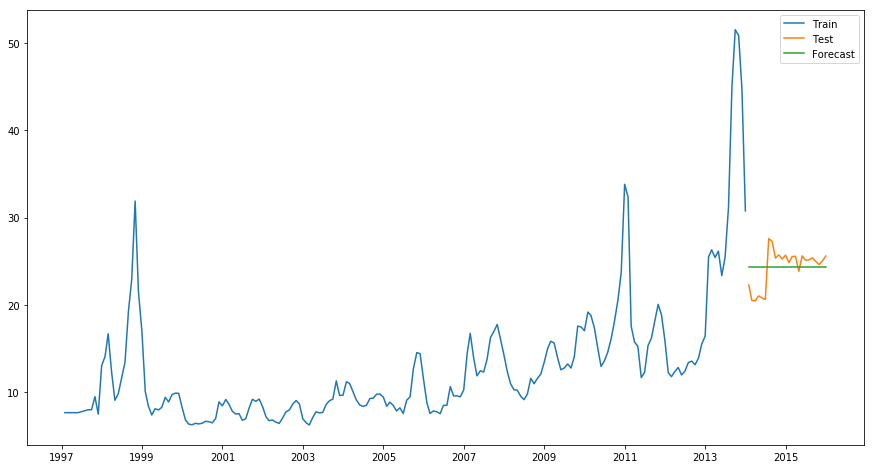

In [50]:
plt.figure(figsize=(15,8))
plt.plot(train.Timeindex, train['Price per Kg'], label = 'Train')
plt.plot(test.Timeindex, test['Price per Kg'], label= 'Test')
plt.plot(test.Timeindex, test['ForecastSE'], label= 'Forecast')
plt.legend()
plt.show()

In [51]:
print('The MAPE value for Simple Exponential is : ', mape(test['Price per Kg'],test['ForecastSE']))

The MAPE value for Simple Exponential is :  7.48


## 2. Double Exponential Model or Holt Linear Model

In [52]:
model = Holt(np.asarray(train['Price per Kg']))

In [53]:
s=0
alpha=[]
beta=[]
for i in range(20):
    alpha.append(s)
    beta.append(s)
    s= s+0.05

In [54]:
alpha_val = []
beta_val = []
mapeval = []
for i in alpha:
    for j in beta:
        model_fit = model.fit(smoothing_level=i, smoothing_slope=j, optimized=False)
        fcst = model_fit.forecast(len(test['Price per Kg']))
        alpha_val.append(i)
        beta_val.append(j)
        mapeval.append(mape(test['Price per Kg'], fcst))

In [55]:
a=pd.DataFrame({'alpha': alpha_val, 'beta': beta_val,'MAPE': mapeval})
a=a.sort_values('MAPE').reset_index()
a.drop('index',axis=1, inplace=True)
a.iloc[1]

alpha     0.95
beta      0.15
MAPE     16.43
Name: 1, dtype: float64

In [56]:
model_fit = model.fit(smoothing_level=0.95, smoothing_slope=0.15, optimized=False)
fcst = model_fit.forecast(len(test['Price per Kg']))
test['ForecastDE'] = fcst

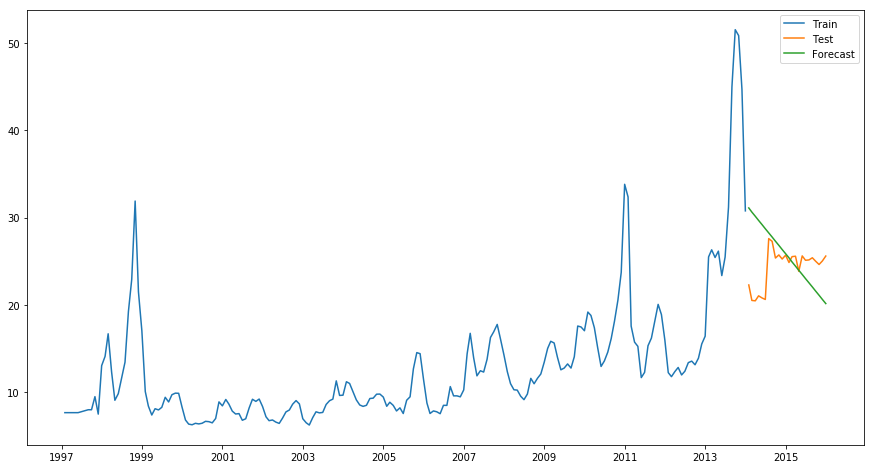

In [57]:
plt.figure(figsize=(15,8))
plt.plot(train.Timeindex, train['Price per Kg'], label = 'Train')
plt.plot(test.Timeindex, test['Price per Kg'], label= 'Test')
plt.plot(test.Timeindex, test['ForecastDE'], label= 'Forecast')
plt.legend()
plt.show()

In [58]:
print('The MAPE value for Double Exponential is : ', mape(test['Price per Kg'],test['ForecastDE']))

The MAPE value for Double Exponential is :  16.43


## 3. Holt-Winter Model

In [59]:
model = ExponentialSmoothing(np.asarray(train['Price per Kg']),seasonal_periods=12,seasonal='add')

In [60]:
s=0
alpha=[]
beta=[]
gamma=[]
for i in range(20):
    alpha.append(s)
    beta.append(s)
    gamma.append(s)
    s= s+0.05

In [61]:
alpha_val=[]
beta_val=[]
gamma_val=[]
mapeval=[]

for i in alpha:
    for j in beta:
        for k in gamma:
            model_fit=model.fit(smoothing_level=i, smoothing_slope=j, smoothing_seasonal=k, optimized=False)
            fcst = model_fit.forecast(len(test['Price per Kg']))
            alpha_val.append(i)
            beta_val.append(j)
            gamma_val.append(k)
            mapeval.append(mape(test['Price per Kg'], fcst))

In [62]:
a=pd.DataFrame({'alpha': alpha_val, 'beta': beta_val,'gamma': gamma_val, 'MAPE': mapeval})
a=a.sort_values('MAPE').reset_index()
a.drop('index',axis=1, inplace=True)
a.iloc[0]

alpha    0.05
beta     0.85
gamma    0.05
MAPE     7.54
Name: 0, dtype: float64

In [63]:
model_fit = model.fit(smoothing_level=0.05,smoothing_slope=0.85, smoothing_seasonal=0.05,optimized=False)
fcst = model_fit.forecast(len(test))
#fttval = model_fit.fittedvalues
test['ForecastHW'] = fcst

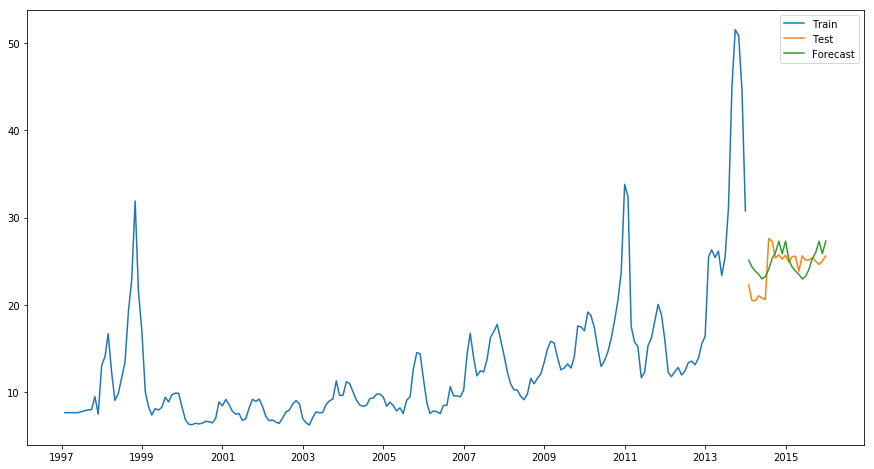

In [64]:
plt.figure(figsize=(15,8))
plt.plot(train.Timeindex, train['Price per Kg'], label = 'Train')
#plt.plot(train.Timeindex, fttval, label = 'Fitted Value')
plt.plot(test.Timeindex, test['Price per Kg'], label= 'Test')
plt.plot(test.Timeindex, test['ForecastHW'], label= 'Forecast')
plt.legend()
plt.show()

In [65]:
print('The MAPE value for Holt-Winters Model is : ', mape(test['Price per Kg'],test['ForecastHW']))

The MAPE value for Holt-Winters Model is :  7.54


## 4. ARIMA Model

### Stationarizing the series

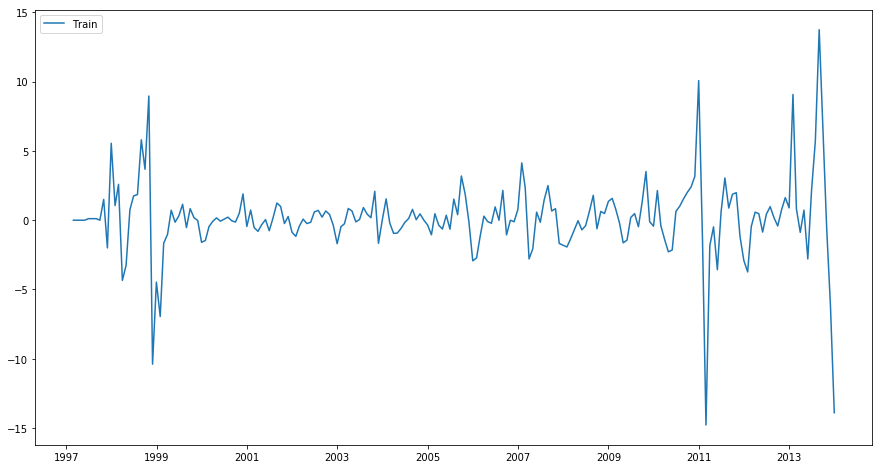

In [66]:
plt.figure(figsize=(15,8))
plt.plot(train.Timeindex, train['Price per Kg'].diff(periods=1), label = 'Train')
plt.legend()
plt.show()

In [67]:
price_station = train['Price per Kg'].diff(periods=1)
price_station.dropna(inplace=True)
stattest = adfuller(price_station)
stattest

(-9.328786494351894,
 9.451420789598696e-16,
 4,
 198,
 {'1%': -3.4638151713286316,
  '5%': -2.876250632135043,
  '10%': -2.574611347821651},
 874.9885406422966)

In [68]:
lag_acf=acf(price_station, nlags=20)
lag_pacf = pacf(price_station, nlags=20)

In [69]:
lag_acf

array([ 1.        ,  0.31789009, -0.01567026, -0.23211888, -0.29639725,
       -0.23430228, -0.07246426,  0.05984421,  0.07924467,  0.10383223,
        0.08761965, -0.05009659, -0.01289257, -0.08032271,  0.01051048,
        0.00426003, -0.04536726, -0.05849845, -0.02045791, -0.06821552,
       -0.09939376])

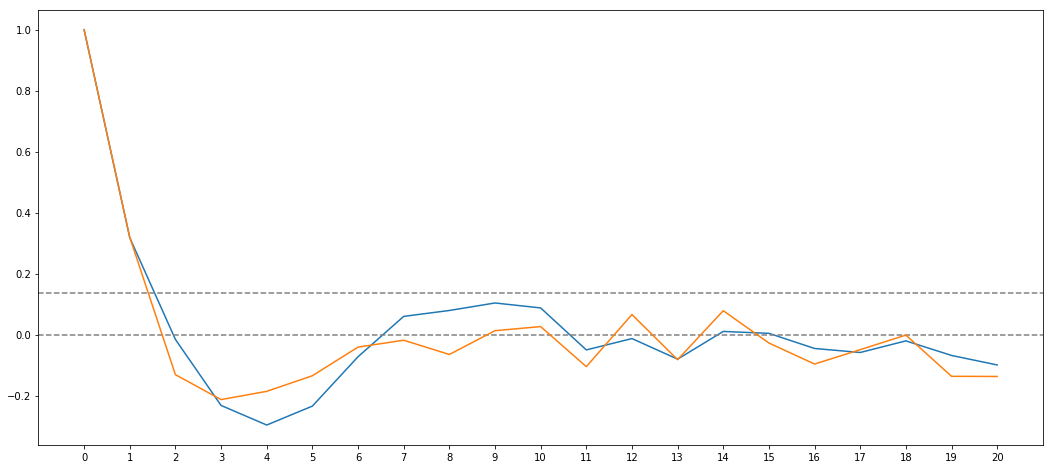

In [70]:
plt.figure(figsize=(18,8))
plt.plot(lag_acf)
plt.axhline(0, linestyle = '--', color='grey')
plt.axhline(1.96/np.sqrt(len(price_station)), linestyle = '--', color='grey')
plt.plot(lag_pacf)
plt.xticks(range(0,21))
plt.show()

We can infer from fuller test that the series is stationary

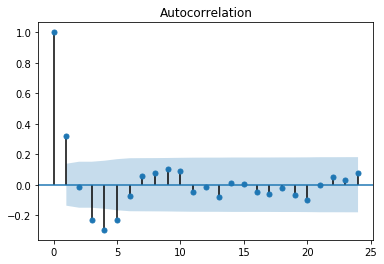

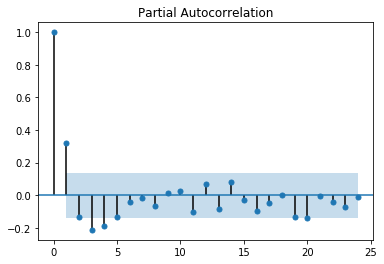

In [71]:
smt.graphics.plot_acf(price_station, lags=24)
smt.graphics.plot_pacf(price_station, lags=24)
plt.show()

From partial correlation, ignore the 0 lag and then check significatn spikes in timeseries, there are two spikes so we will take AR(2) for the model. Also the cutoff in Auto-corelation graph is at 0 lag, so the best model will habe MA(0). Difference we already know is 1. So with this information we can do ARIMA(2,1,0) model for the dataset.

We will also check AIC to get best parameters

In [72]:
p=d=q=range(0,3)

In [73]:
pdq = list(itertools.product(p,d,q))

In [74]:
aic_val=[]
pdq_val=[]
for i in pdq:
    try:
        model = ARIMA(train['Price per Kg'], order= i)
        model_fit = model.fit()
        aic_val.append(model_fit.aic)
        pdq_val.append(i)
    except:
        continue

In [75]:
a= pd.DataFrame({'pdq': pdq_val, 'AIC': aic_val})
a.sort_values('AIC', inplace=True)
a.iloc[0]

pdq    (2, 1, 2)
AIC      949.345
Name: 20, dtype: object

In [76]:
model = ARIMA(train['Price per Kg'], order= (2,1,2))
model_fit = model.fit()
fcst=model_fit.forecast(steps=24)[0]
test['ForecastAR'] = fcst

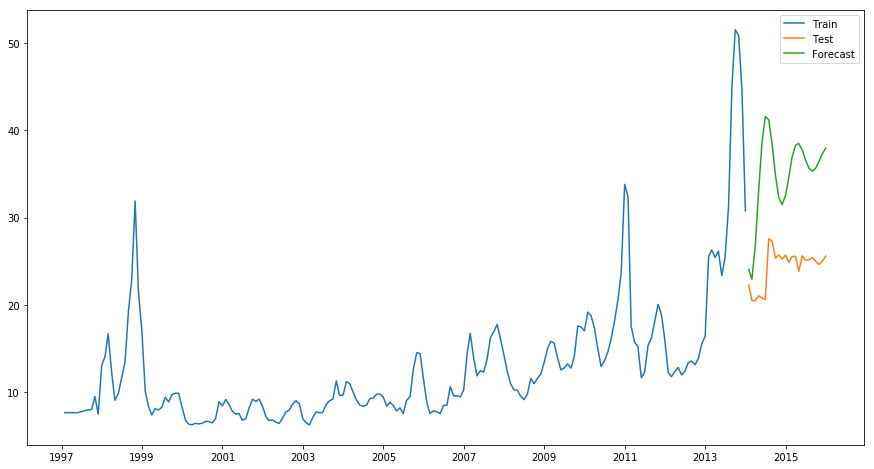

In [77]:
plt.figure(figsize=(15,8))
plt.plot(train.Timeindex, train['Price per Kg'], label = 'Train')
plt.plot(test.Timeindex, test['Price per Kg'], label= 'Test')
plt.plot(test.Timeindex, test['ForecastAR'], label= 'Forecast')
plt.legend()
plt.show()

In [78]:
print('The MAPE value for ARIMA Model is : ', mape(test['Price per Kg'],test['ForecastAR']))

The MAPE value for ARIMA Model is :  43.99


## 5. Seasonal ARIMA

In [79]:
p=d=q=range(0,2)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0],x[1],x[2],12) for x in pdq]

In [80]:
aic_val = []
pdq_val = []
spdq_val = []

for i in pdq:
    for j in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(train['Price per Kg'], order=i,seasonal_order=j,enforce_stationarity=True)
            model_fit = model.fit()
            aic_val.append(model_fit.aic)
            pdq_val.append(i)
            spdq_val.append(j)
        except:
            continue


In [81]:
a= pd.DataFrame({'pdq': pdq_val, 'spdq': spdq_val, 'AIC': aic_val})
a.sort_values('AIC', inplace=True)
a.iloc[0]

pdq         (1, 0, 1)
spdq    (0, 1, 1, 12)
AIC           935.633
Name: 31, dtype: object

In [82]:
model = sm.tsa.statespace.SARIMAX(train['Price per Kg'], order=(1,0,1),seasonal_order=(0,1,1,12),enforce_stationarity=True)
model_fit = model.fit()
fcst=model_fit.forecast(steps=24)
test['ForecastSAR'] = fcst

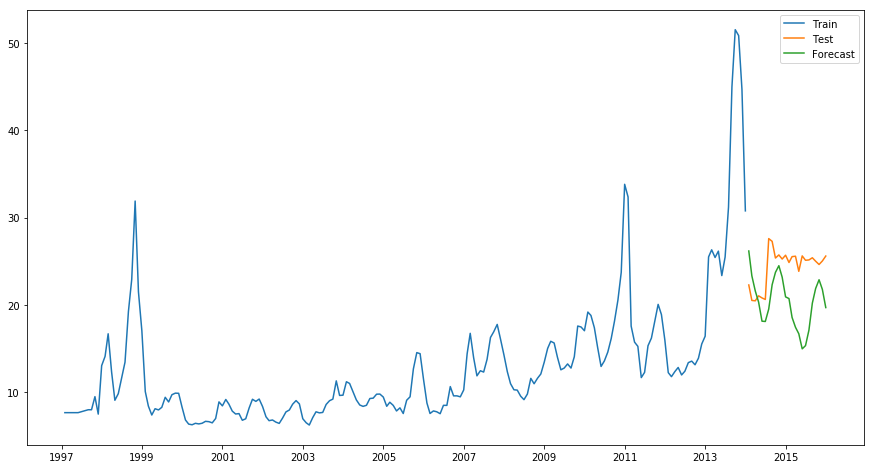

In [83]:
plt.figure(figsize=(15,8))
plt.plot(train.Timeindex, train['Price per Kg'], label = 'Train')
plt.plot(test.Timeindex, test['Price per Kg'], label= 'Test')
plt.plot(test.Timeindex, test['ForecastSAR'], label= 'Forecast')
plt.legend()
plt.show()

In [84]:
print('The MAPE value for Seasonal ARIMA Model is : ', mape(test['Price per Kg'],test['ForecastSAR']))

The MAPE value for Seasonal ARIMA Model is :  18.53


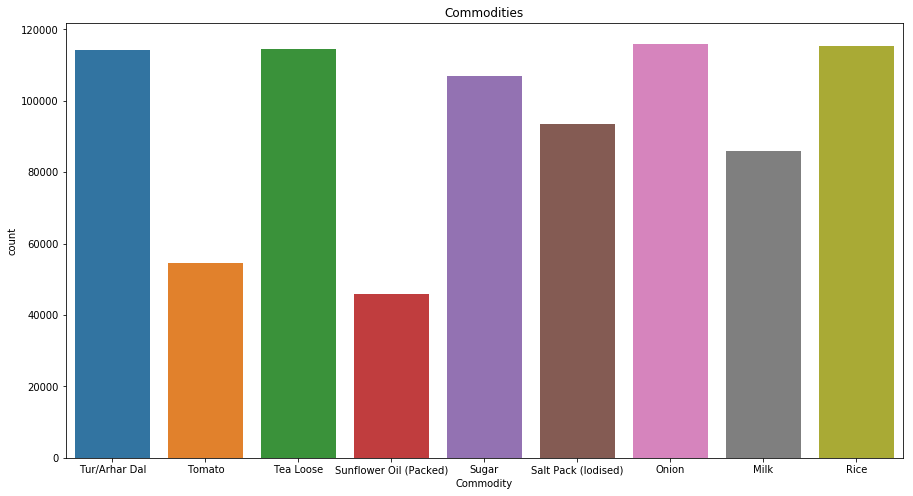

In [85]:
plt.figure(figsize=(15,8))
sns.countplot(x='Commodity', data=como)
plt.title('Commodities')
plt.show()

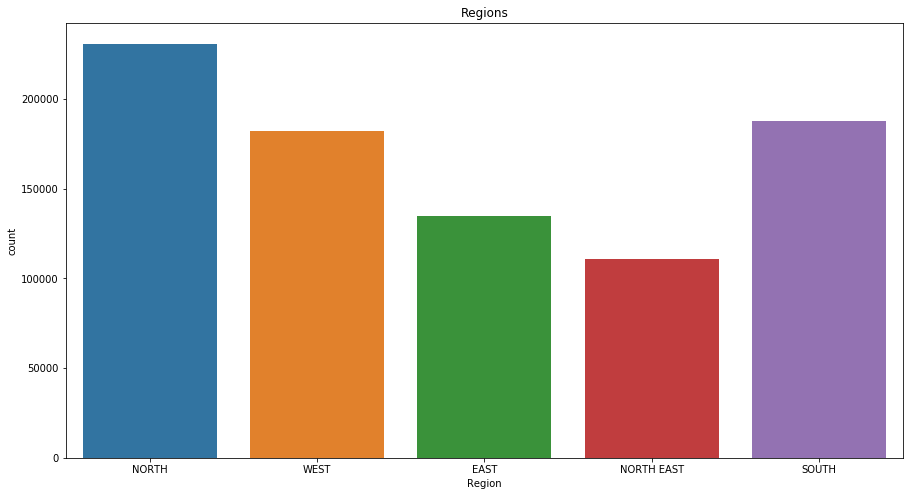

In [86]:
plt.figure(figsize=(15,8))
sns.countplot(x='Region', data=como)
plt.title('Regions')
plt.show()

In [87]:
dal.head()

,Month-year,Price per Kg,Month,Year,Timeindex
0,1997-01,7.666667,Jan,1997,1997-01-31
1,1997-02,7.666667,Feb,1997,1997-02-28
2,1997-03,7.666667,Mar,1997,1997-03-31
3,1997-04,7.666667,Apr,1997,1997-04-30
4,1997-05,7.666667,May,1997,1997-05-31


In [88]:
como.head()

,Date,Centre,Commodity,Price per Kg,Region,Country,Timeindex,Month-year
0,25-11-1997,LUCKNOW,Tur/Arhar Dal,15.0,NORTH,INDIA,1997-11-25,1997-11
1,25-11-1997,BHOPAL,Tur/Arhar Dal,18.0,WEST,INDIA,1997-11-25,1997-11
2,25-11-1997,JAIPUR,Tur/Arhar Dal,20.0,WEST,INDIA,1997-11-25,1997-11
3,25-11-1997,SHIMLA,Tur/Arhar Dal,21.5,NORTH,INDIA,1997-11-25,1997-11
4,25-11-1997,AHMEDABAD,Tur/Arhar Dal,21.5,WEST,INDIA,1997-11-25,1997-11


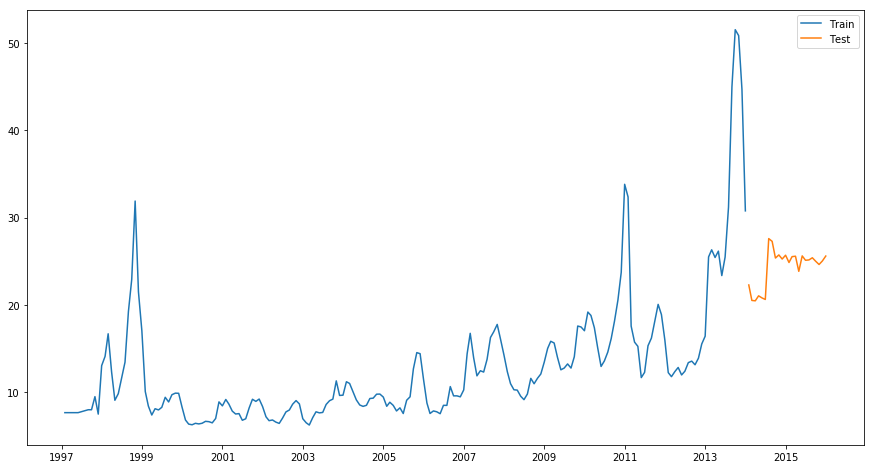

In [89]:
plt.figure(figsize=(15,8))
plt.plot(train.Timeindex, train['Price per Kg'], label = 'Train')
plt.plot(test.Timeindex, test['Price per Kg'], label= 'Test')
plt.savefig('train-test')
plt.legend()
plt.show()

In [90]:
test

,Month-year,Price per Kg,Month,Year,Timeindex,ForecastSE,ForecastDE,ForecastHW,ForecastAR,ForecastSAR
204,2014-01,22.282609,Jan,2014,2014-01-31,24.319703,31.098930,25.116091,24.083172,26.171076
205,2014-02,20.511029,Feb,2014,2014-02-28,24.319703,30.623022,24.367423,22.944030,23.320332
206,2014-03,20.469256,Mar,2014,2014-03-31,24.319703,30.147114,23.860106,26.737518,21.592740
207,2014-04,21.038462,Apr,2014,2014-04-30,24.319703,29.671206,23.510588,32.957775,20.324049
208,2014-05,20.799401,May,2014,2014-05-31,24.319703,29.195298,22.973742,38.615638,18.136328
209,2014-06,20.622837,Jun,2014,2014-06-30,24.319703,28.719389,23.239826,41.561729,18.103584
210,2014-07,27.588785,Jul,2014,2014-07-31,24.319703,28.243481,24.071073,41.195785,19.522885
211,2014-08,27.275261,Aug,2014,2014-08-31,24.319703,27.767573,25.309049,38.396752,22.310113
212,2014-09,25.364238,Sep,2014,2014-09-30,24.319703,27.291665,25.977496,34.861146,23.721246
213,2014-10,25.719764,Oct,2014,2014-10-31,24.319703,26.815757,27.287253,32.241370,24.486401


In [91]:
def rmse_val(par1, par2):
    val = np.sqrt(np.mean(np.square(par1-par2)))
    return val

ac = test['Price per Kg']
se = test['ForecastSE']
de = test['ForecastDE']
hw = test['ForecastHW']
ar = test['ForecastAR']
sr = test['ForecastSAR']

print('SE: ', rmse_val(ac,se))
print('DE: ', rmse_val(ac,de))
print('HW: ', rmse_val(ac,hw))
print('AR: ', rmse_val(ac,ar))
print('SR: ', rmse_val(ac,sr))

SE:  2.1002355591386883
DE:  4.970377359869189
HW:  2.060478865638346
AR:  11.401860489180134
SR:  5.401829727712219
